In [1]:
import pandas as pd
import numpy as np
import os
print(os.getcwd()) 

/Users/dhyeymavani/Desktop


In [50]:
data_file_path = "./2022q3.csv"
data = pd.read_csv(data_file_path)
data

cols = ["patient.patientsex","patient.patientonsetage","patient.patientweight","drugadministrationroute","serious"]

cleanup_data = {"patient.patientsex": {1.0: 1,
                                        2.0: 0,
                                        0.0: np.nan
                                    },
                "serious": {1.0:1,
                            2.0:0
                           }
                }

feature_engineered_data = data[cols].dropna()

intermediate_data = feature_engineered_data.replace(cleanup_data)

final_data = intermediate_data.dropna()

print(final_data)
features = ["patient.patientsex","patient.patientonsetage","patient.patientweight","drugadministrationroute"]
X = final_data[features]
Y = final_data["serious"]
print(X)
print(Y)

print(Y.value_counts())                                             

/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_76866/565182943.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file_path)


         patient.patientsex  patient.patientonsetage  patient.patientweight  \
7                       0.0                     73.0                  65.90   
20                      1.0                     37.0                  76.00   
21                      1.0                     37.0                  76.00   
22                      1.0                     37.0                  76.00   
23                      1.0                     37.0                  76.00   
...                     ...                      ...                    ...   
1618227                 0.0                    744.0                  61.70   
1618255                 0.0                     36.0                  59.50   
1618256                 0.0                     36.0                  59.50   
1618257                 0.0                     36.0                  59.50   
1618263                 1.0                     30.0                  86.18   

         drugadministrationroute  serious  
7      

In [51]:
X.corr()

,patient.patientsex,patient.patientonsetage,patient.patientweight,drugadministrationroute
patient.patientsex,1.000000,-0.001522,0.096664,-0.055606
patient.patientonsetage,-0.001522,1.000000,0.024805,0.023908
patient.patientweight,0.096664,0.024805,1.000000,0.053089
drugadministrationroute,-0.055606,0.023908,0.053089,1.000000


In [52]:
training_final_data = final_data.sample(frac=0.8, random_state=8990)
testing_final_data = final_data.drop(training_final_data.index)

print(f"No. of training examples: {training_final_data.shape[0]}")
print(f"No. of testing examples:   {testing_final_data.shape[0]}")



No. of training examples: 225514
No. of testing examples:   56379


In [53]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

# split dataset in features and target variable
# note that we got rid of euribor3m and nr.employed 
# in order to fix the multicollinearity issue

X_train = training_final_data[features] # Features
Y_train = training_final_data["serious"] # Target variable

X_test = testing_final_data[features] # Features
Y_test = testing_final_data["serious"] # Target variable

logistic_model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

[[ 15166  10514]
 [ 97256 102578]]


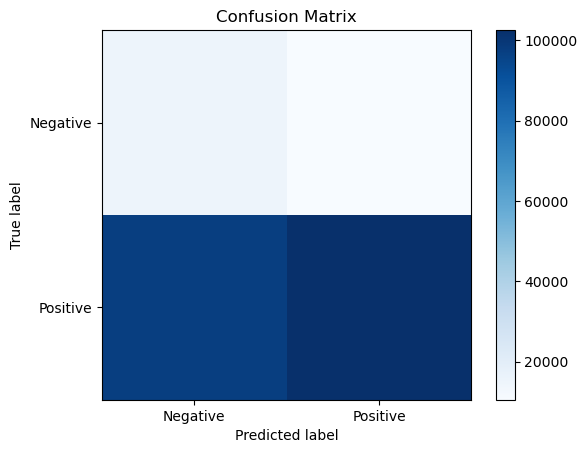

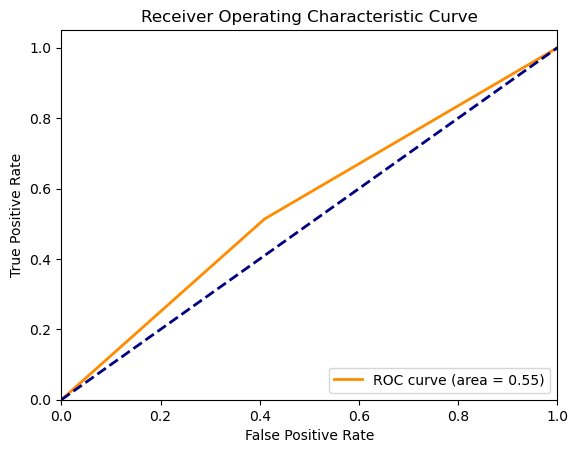

In [57]:
# On the Training Data
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the classes for the test data
Y_pred = logistic_model.predict(X_train)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Compute the false positive rate, true positive rate and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the test data
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

[[ 3806  2628]
 [24247 25698]]
Accuracy score is  0.5233154188616329
F1 score is  0.6566416680507469


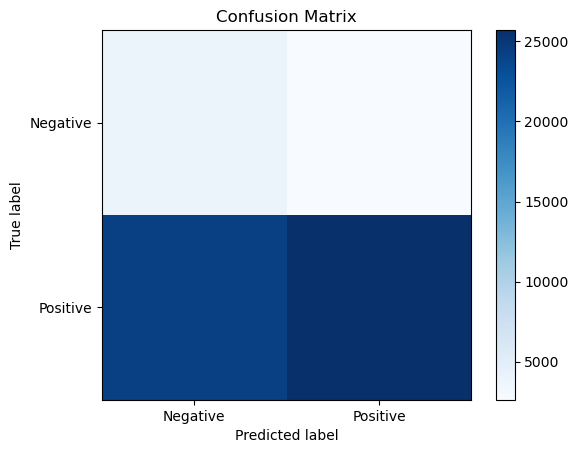

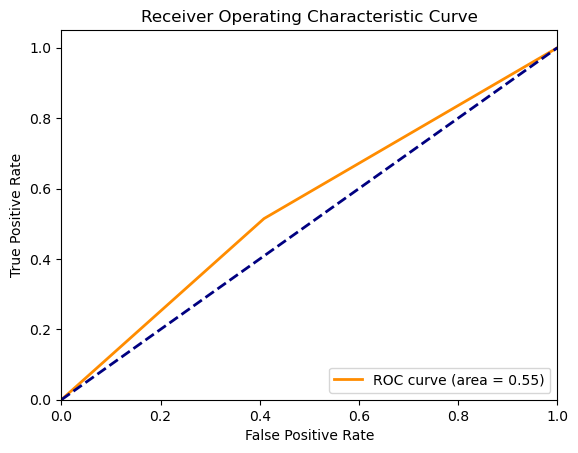

In [55]:
# On Testing Data
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Predict the classes for the test data
Y_pred = logistic_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
print("Accuracy score is ", accuracy_score(Y_test, Y_pred))
print("F1 score is ", f1_score(Y_test, Y_pred))
# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Compute the false positive rate, true positive rate and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the test data
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']} # l1 lasso l2 ridge

# Create a 5-fold cross-validation object
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(logistic_model, X, Y, cv = kfold)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# Create a grid search object
grid_search = GridSearchCV(logistic_model, param_grid, cv = kfold,
                           scoring = 'accuracy', return_train_score = True)

# Fit the grid search object to the data
grid_search.fit(X[features], Y)

# Print the best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Cross-validation scores: [0.55987158 0.52131113 0.52409585 0.52481464 0.51952889]
Mean cross-validation score: 0.5299244198851992
Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.5299279668648836
